# CS229, Fall 2017
## Problem Set 2: Supervised Learning II

This is my solutions for CS229 - Fall 2017: Machine Learning taught by Andrew Ng.

The material for Problem Set 2 is here: [ps2](https://github.com/nmduonggg/ML-CS229/blob/master/Problem%20Set%202/ps2.pdf)

This notebook contains the solution for __Question 1: Logistic Training Stability__

In [1]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('notebook')
plt.rcParams['figure.figsize']=(20,20)
%matplotlib inline

In [2]:
try:
    xrange
except NameError:
    xrange = range

def add_intercept(X_):
    m, n = X_.shape
    X = np.zeros((m, n + 1))
    X[:, 0] = 1
    X[:, 1:] = X_
    return X

def load_data(filename):
    D = np.loadtxt(filename)
    Y = D[:, 0]
    X = D[:, 1:]
    return add_intercept(X), Y

def calc_grad(X, Y, theta):
    m, n = X.shape
    grad = np.zeros(theta.shape)

    margins = Y * X.dot(theta)
    probs = 1. / (1 + np.exp(margins))
    grad = -(1./m) * (X.T.dot(probs * Y))

    return grad

def logistic_regression(X, Y):
    m, n = X.shape
    theta = np.zeros(n)
    learning_rate = 10

    i = 0
    while True:
        i += 1
        prev_theta = theta
        grad = calc_grad(X, Y, theta)
        theta = theta  - learning_rate * (grad)
        if i % 10000 == 0:
            print('Finished %d iterations' % i)
        if np.linalg.norm(prev_theta - theta) < 1e-15:
            print('Converged in %d iterations' % i)
            break
    return

def main():
    print('==== Training model on data set A ====')
    Xa, Ya = load_data('./data/data_a.txt')
    logistic_regression(Xa, Ya)

    print('\n==== Training model on data set B ====')
    Xb, Yb = load_data('./data/data_b.txt')
    logistic_regression(Xb, Yb)

    return

if __name__ == '__main__':
    main()

==== Training model on data set A ====
Finished 10000 iterations
Finished 20000 iterations
Finished 30000 iterations
Converged in 30396 iterations

==== Training model on data set B ====
Finished 10000 iterations
Finished 20000 iterations
Finished 30000 iterations
Finished 40000 iterations
Finished 50000 iterations
Finished 60000 iterations
Finished 70000 iterations
Finished 80000 iterations
Finished 90000 iterations
Finished 100000 iterations
Finished 110000 iterations
Finished 120000 iterations
Finished 130000 iterations
Finished 140000 iterations
Finished 150000 iterations
Finished 160000 iterations
Finished 170000 iterations
Finished 180000 iterations
Finished 190000 iterations
Finished 200000 iterations
Finished 210000 iterations
Finished 220000 iterations
Finished 230000 iterations
Finished 240000 iterations
Finished 250000 iterations
Finished 260000 iterations
Finished 270000 iterations
Finished 280000 iterations
Finished 290000 iterations
Finished 300000 iterations
Finished 310

KeyboardInterrupt: 

### Question 1.a)

- Algorithm on dataset A converges after 30396 iterations
- Algorithm on dataset B might not converge in suitable time

In [3]:
columns = ["y", "x1", "x2"]
dataA = pd.read_csv("./data/data_a.txt", sep = "\s+", header = None)
dataB = pd.read_csv("./data/data_b.txt", sep = "\s+", header = None)
dataA.columns = columns
dataB.columns = columns

In [4]:
dataA.head()

,y,x1,x2
0,-1.0,0.601266,0.165091
1,1.0,0.871725,0.527361
2,-1.0,0.372548,0.446609
3,-1.0,0.013577,0.051358
4,1.0,0.583032,0.710619


In [5]:
dataB.head()

,y,x1,x2
0,-1.0,0.595663,0.193072
1,-1.0,0.436997,0.544807
2,1.0,0.899945,0.845922
3,-1.0,0.555064,0.009263
4,-1.0,0.074687,0.282845


In [6]:
dataA.describe()

,y,x1,x2
count,100.000000,100.000000,100.000000
mean,-0.080000,0.492262,0.529792
std,1.001817,0.293859,0.287287
min,-1.000000,0.004816,0.022107
25%,-1.000000,0.218549,0.303565
50%,-1.000000,0.487797,0.585369
75%,1.000000,0.754266,0.754063
max,1.000000,0.994422,0.984457


In [7]:
dataB.describe()

,y,x1,x2
count,100.0,100.000000,100.000000
mean,0.1,0.512781,0.502707
std,1.0,0.303099,0.288268
min,-1.0,0.013795,0.000298
25%,-1.0,0.256866,0.280513
50%,1.0,0.540715,0.502159
75%,1.0,0.800187,0.723326
max,1.0,0.994943,0.983413


Text(0.5, 1.0, 'dataA')

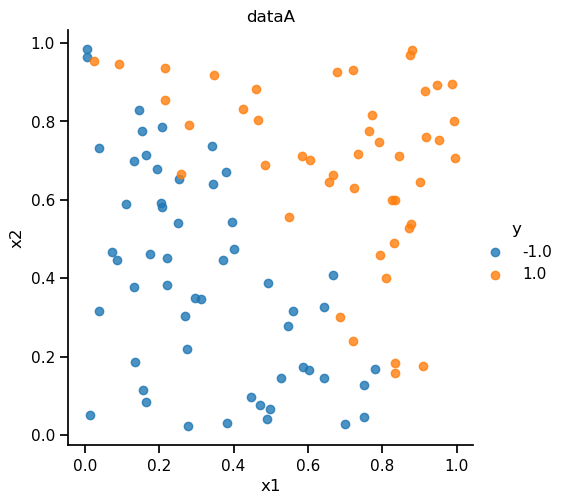

In [9]:
sns.lmplot(x = "x1", y = "x2", hue = "y", data = dataA, fit_reg = False)
plt.title("dataA")

Text(0.5, 1.0, 'dataB')

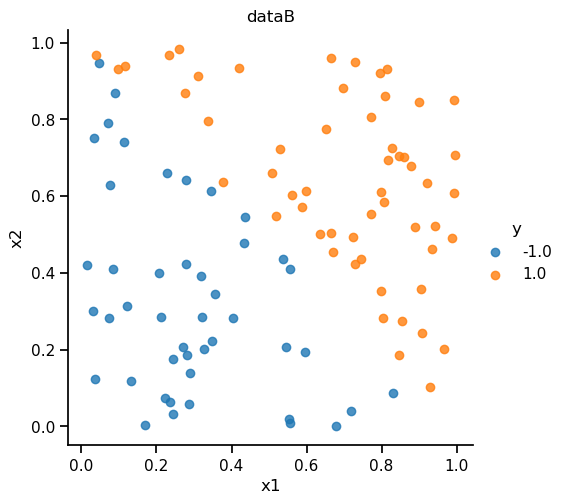

In [10]:
sns.lmplot(x = "x1", y = "x2", hue = "y", data = dataB, fit_reg = False)
plt.title("dataB")

### Question 1.b)
 
Imagine that the real data point is very small comparing to the dots appeared on figure, then data B seems to be linearly separable. Obviously, data A has some blended region which contains data from both classes, while all data of data B are mostly separated into 2 field of the graph.

This assumption will affect the process of logistic regression. In logistic regression, our goal is to maximize the log-likelihood function which is:

$$\sum_{i=1}^m y^i \log (h_{\theta}(x^i)) + (1 - y^i) \log (1 - h_{\theta}(x^i))$$

which is obtained by the optimal $\theta$ of its gradient:
$$
\nabla_{\theta_j} l = ((y - h_\theta (x))x_j = 0
$$

Through Gradient Ascent or Newton's method, we can find the optimal parameters. The main idea of those algorithms are to minimize gradient of log-likelihood function to as close to 0 as possible. Now, discuss about our 2 datasets. 
- Data A has some blended region of 2 classes which absolutely causes some misclassification and prevent the possibility of $y - h_{\theta}(x)$ to be 0. In this case $\theta \in R$
- Data B is linear separable (as assumed above) which means there exists a decision boundary that can perfectly separte 2 classes. In order to find that decision boundary, our parameter $\theta$ will try to minimize the gradient of log-likelihood function.

$$
\begin{align*}
    &\nabla_{\theta_j} l = (y - h(x))x_j = 0 \\
    \implies \quad \quad & y - \frac{1}{1 + e^{-\theta^Tx}} = 0 \\
    & y = 1 \implies \frac{1}{e^{\theta^Tx}} = 0 \\
    \iff \quad \quad &\theta \to \infty
\end{align*}
$$

Thus, to find a decison boundary for linearly separable data iteratively, $\theta$ might reach infinity. If we don't have other method to break the process, algorithm running on data B might not converge.

### Question 1.c)

  __i. Using a different constant learning rate__: The problem here is $\theta$ go to infinity then adjust learning rate just change the speed it comes to infinity, still not converge.

 __ii. Decreasing the learning rate over time (e.g. scaling by $1/t^2$)__: same reason as above, still reach infinity and not converge.

__iii. Adding a regularization term $||\theta||^2_2$ to the loss function__: This might work since our problem is $\theta$ is unbounded and reaches to infinity. By adding a regularization term, we set upper bound (domain constraint) for $\theta$ and by this way, we might efficiently prevent overfitting of the algorithm

 __iv. Linear scaling of input feature__: Linear scaling does not change the consequences of gradient being 0 at all, then it does not work.

   __v. Adding zero-mean Gaussian noise to the training data or label__: This might work since the noise might fluctuate the position of data points which break the linear separability in some training sets, but this method is in stable and does not overcome the problem completely

### Question 1.d)

Support Vector Machines with hinge loss will try to minimize the following loss function withou any constraint:

$$J(\theta, b) = \sum_{i=1}^m \max \bigg(0, 1 - y^i(\theta^Tx^i +b)\bigg) $$

When it reaches the optimal solutions, $J(\theta, b) = 0  \forall y^i(\theta^Tx^i + b) \geq 1$. Then suppose during the running process, if $\theta$ is positive/negative large enough to make the above assumption true, $\theta$ does not have to raise. Otherwise, if $y^i(\theta^Tx^i + b) < 1$, $\theta$ needs to decrease closer to 0. By this methodology, Hinge-loss SVM is not vulnerable to dataset B.

However, I think our solution might not be stable since the searching domain for $\theta$ is unbounded. This can be solved by adding a regularization term into the loss function.